PROJECT 1 TASK 2

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv('superstore.csv')
print(df.head())
print(df.info())



          Category         City        Country Customer.ID     Customer.Name  \
0  Office Supplies  Los Angeles  United States   LS-172304  Lycoris Saunders   
1  Office Supplies  Los Angeles  United States   MV-174854     Mark Van Huff   
2  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
3  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
4  Office Supplies  Los Angeles  United States   AP-109154    Arthur Prichep   

   Discount Market  记录数               Order.Date        Order.ID  ... Sales  \
0       0.0     US    1  2011-01-07 00:00:00.000  CA-2011-130813  ...    19   
1       0.0     US    1  2011-01-21 00:00:00.000  CA-2011-148614  ...    19   
2       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...    21   
3       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...   111   
4       0.0     US    1  2011-09-29 00:00:00.000  CA-2011-146969  ...     6   

    Segment                Ship.Date       S

In [19]:
print("missing values",df.isnull().sum())
print("duplicate values",df.duplicated().sum())
print(df.describe())

missing values Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64
duplicate values 0
           Discount      记录数        Profit      Quantity       Row.ID  \
count  51290.000000  51290.0  51290.000000  51290.000000  51290.00000   
mean       0.142908      1.0     28.610982      3.476545  25645.50000   
std        0.212280      0.0    174.340972      2.278766  14806.29199   
min        0.000000      1.0  -6599.978000      1.000000      1.00000   
25%        0.000000      1.0      0.000000      

In [20]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)


In [21]:
numeric_df=df.select_dtypes(include=[np.number])
Q1=numeric_df.quantile(0.25)
Q3=numeric_df.quantile(0.75)
IQR=Q3-Q1
print(IQR)
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=numeric_df[((numeric_df<lower_bound)|(numeric_df>upper_bound)).any(axis=1)]
print("number of outliers:",outliers.shape[0])
df_cleaned=df[~((numeric_df<lower_bound)|(numeric_df>upper_bound)).any(axis=1)]
print('new dataset shape:',df_cleaned.shape[0])

Discount             0.20
记录数                  0.00
Profit              36.81
Quantity             3.00
Row.ID           25644.50
Sales              220.00
Shipping.Cost       21.84
Year                 2.00
weeknum             24.00
dtype: float64
number of outliers: 14979
new dataset shape: 36311


In [22]:
print('mean:',numeric_df.mean())
print('median:',numeric_df.median())
print('standard deviation:',numeric_df.std())
print('variance:',numeric_df.var())
print('corelation matrix:',numeric_df.corr())

mean: Discount             0.142908
记录数                  1.000000
Profit              28.610982
Quantity             3.476545
Row.ID           25645.500000
Sales              246.498440
Shipping.Cost       26.375818
Year              2012.777208
weeknum             31.287112
dtype: float64
median: Discount             0.00
记录数                  1.00
Profit               9.24
Quantity             3.00
Row.ID           25645.50
Sales               85.00
Shipping.Cost        7.79
Year              2013.00
weeknum             33.00
dtype: float64
standard deviation: Discount             0.212280
记录数                  0.000000
Profit             174.340972
Quantity             2.278766
Row.ID           14806.291990
Sales              487.567175
Shipping.Cost       57.296810
Year                 1.098931
weeknum             14.429795
dtype: float64
variance: Discount         4.506277e-02
记录数              0.000000e+00
Profit           3.039477e+04
Quantity         5.192776e+00
Row.ID           

DATA VISUALISATION

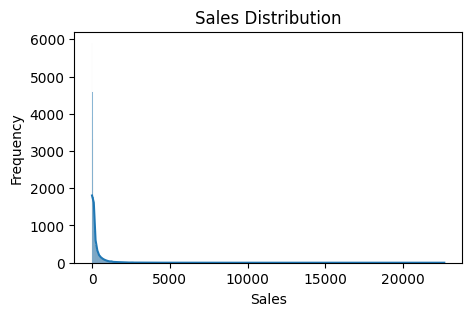

In [23]:
plt.figure(figsize=(5,3))
sns.histplot(df['Sales'],kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [24]:
if 'profit' in df.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df['profit'])
    plt.title('Category wise profit')
    plt.show()
else:
    print('profit column not found')    

profit column not found


C:\Users\mitha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\mitha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\mitha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\mitha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: 

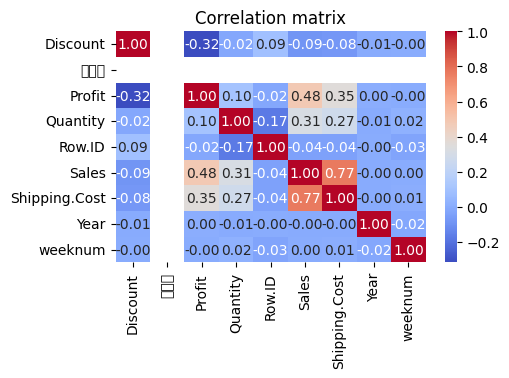

In [25]:
plt.figure(figsize=(5,3))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation matrix')
plt.show()

    PROJECT 2 SALES PERFORMENCE ANALYSIS

In [26]:
df1=pd.read_csv('sales.csv')
print(df1.head())
print(df1.info())
print('missing values:',df.isnull().sum())
print('duplicate values:',df.duplicated().sum())
print(df1.describe())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  2016/11/08  2016/11/11    Second Class    CG-12520   
1       2  CA-2016-152156  2016/11/08  2016/11/11    Second Class    CG-12520   
2       3  CA-2016-138688  2016/06/12  2016/06/16    Second Class    DV-13045   
3       4  US-2015-108966  2015/10/11  2015/10/18  Standard Class    SO-20335   
4       5  US-2015-108966  2015/10/11  2015/10/18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [27]:
numeric_columns=df1.select_dtypes(include=[np.number]).columns
df1[numeric_columns]=df1[numeric_columns].fillna(df1[numeric_columns].mean())
non_numeric_cols=df1.select_dtypes(exclude=[np.number]).columns
df1[non_numeric_cols]=df1[non_numeric_cols].fillna(df1[non_numeric_cols].mode().iloc[0])
df1.drop_duplicates(inplace=True)
print('missing values:',df1.isnull().sum())
print('duplicate values:',df1.duplicated().sum())

missing values: Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
duplicate values: 0


In [28]:
if 'Order Date' in df1.columns and 'Ship Date' in df1.columns:
    df1["Order Date"] = pd.to_datetime(df1["Order Date"])
    df1["Ship Date"] = pd.to_datetime(df1["Ship Date"])
    print(df1.info())
else:
    print("Columns 'Order Date' and/or 'Ship Date' do not exist in the DataFrame.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64


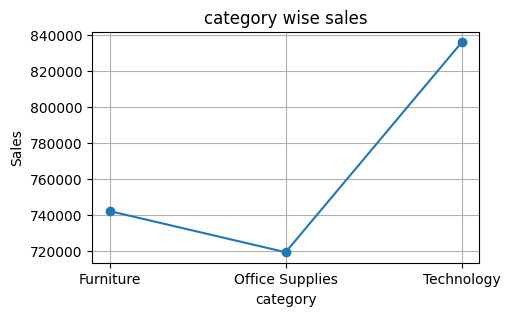

In [34]:
#Exploratory Data Analysis
df1_grouped=df1.groupby('Category')['Sales'].sum()
print(df1_grouped)
plt.figure(figsize=(5,3))
plt.plot(df1_grouped.index,df1_grouped.values,marker='o')
plt.title('category wise sales')
plt.xlabel('category')
plt.ylabel('Sales')
plt.grid()
plt.show()



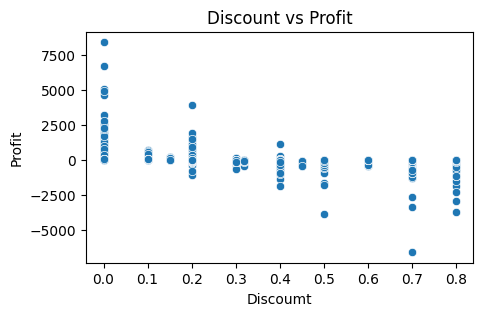

In [36]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='Discount',y='Profit',data=df1)
plt.title('Discount vs Profit')
plt.xlabel('Discoumt')
plt.ylabel('Profit')
plt.show()

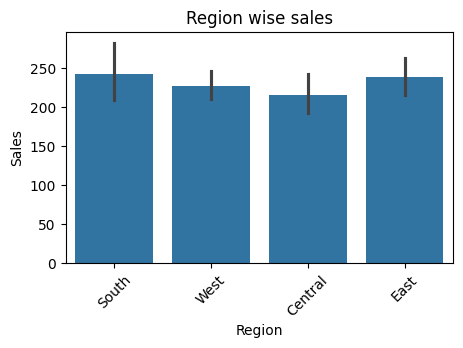

In [31]:
# Strip any leading or trailing spaces from column names
df1.columns = df1.columns.str.strip()

# Ensure the column 'region' exists in the DataFrame
if 'Region' in df1.columns and 'Sales' in df1.columns:
    plt.figure(figsize=(5, 3))
    sns.barplot(x='Region', y='Sales', data=df1)
    plt.title('Region wise sales')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Columns 'region' and/or 'sales' do not exist in the DataFrame.")

predictive data analysis

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Select features (X) and target variable (y)
X = df[["Profit", "Discount"]]  # Independent variables
y = df["Sales"]  # Target variable

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [39]:
# Predict sales on test data
y_pred = model.predict(X_test)

# Compute R² score and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")


R² Score: 0.11428823787896591
Mean Squared Error (MSE): 241642.61630233363


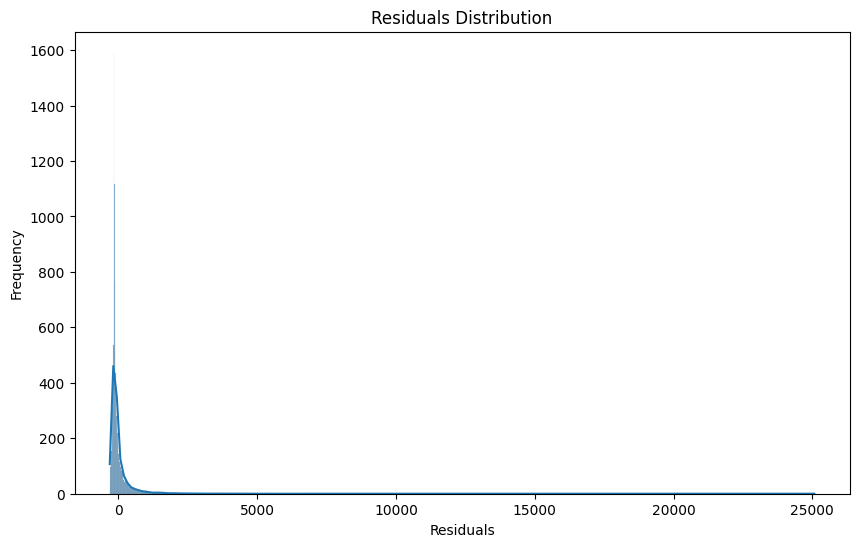

In [41]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()